# CHM210 Assignment 1: Stratospheric Chemistry

Welcome to the first assignment for CHM210. We are going to use a <a href="https://jupyter4edu.github.io/jupyter-edu-book/">Jupyter notebook</a> with Python to investigate some properties of stratospheric chemistry and the ozone layer. There are a lot of free, online resources out there to help you with Jupyter and Python. I recommend Christian Hill's <a href="https://scipython.com/book/">"Learning Scientific Programming with Python"</a>. The chemistry content of this assignment should follow your textbook and lecture notes, but for those wanting additional materials, Daniel Jacob's <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/">"Introduction to Atmospheric Chemistry"</a> is freely available online and has several relevant chapters for this assignment (Ch1. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap1.html#pgfId=518053">"Measures of Atmospheric Composition</a>, Ch2. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap2.html#pgfId=496461">"Atmospheric Pressure"</a>,  and Ch10. <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap10.html#pgfId=46289">"Stratospheric Ozone"</a>).

We are going to look at some real satellite data related to the structure and composition of the stratosphere in order to better understand the chemistry that takes place. The below image is data from the Atmospheric Infrared Sounder, or AIRS, instrument from NASA's Earth Observing System (EOS) polar-orbiting platform. This data is freely available through NASA's EarthData portal, <a href="https://giovanni.gsfc.nasa.gov/giovanni/">GIOVANNI</a>. 
<img src="http://individual.utoronto.ca/sck/CHM210/GIOVANNI-output8IOXbvLT.png">
The above data is a daily averaged vertical profile of ozone over Toronto from September 23rd, 2016. We can see where the ozone "layer" is on this graph. But <i>why</i> does it form there?

First things first, we need to import the Python modules we will be using for this assignment. Press the "Run" button (or ctrl-enter) on the box below to import the packages we need. If done successfully, the "You have imported the above packages!" text will display below. 

## Importing Python modules and getting to know Python

In [ ]:
# lines that start with a "#" character are comments (Python doesn't treat them as code, but they are helpful for including explanations of why we have written code a particular way)
# the import statements are how we add the specific packages we want to use
# when we write "import YYYYYY as Y", we are creating a shortform "Y" that we can use to reference the package "YYYYYY"  
import matplotlib.pyplot as plt
import math as m
import numpy as np
import os
# below is a simple print statement that will appear as text when we run this box of code
# you can easily change what text prints here by editing the words between the ""
print("You have imported the above modules!")

Let's practice some simple math before we get started to make sure you're comfortable using this Notebook. Run the code below (and feel free to change things) to see what simple arithmetic looks like in Python.

In [ ]:
5+10

There are several useful, pre-built, functions you can play with, like max(), min()

In [ ]:
# max() returns the maximum value of all arguments you give it
max(1,3,6,10,5)

We can also easily write our own functions, as below:

In [ ]:
# We are defining our own function called "mean" that will take in an "array" of numbers and return the mean
def mean(array): 
    # the sum function returns the sum of all values in our array
    # the len function returns the number of elements in our array 
    return sum(array) / len(array) 

Now let's use our new function

In [ ]:
# this is just a test array (the name isn't meaningful nor the numbers we're starting with) 
testarray = [4,7,10,11,100]
# now we call our function with the testarray as the input
mean(testarray)

Now let's look what that math package we imported allows us to do. 

In [ ]:
# the default logarithm is the natural log (ie. base e)
m.log(10)

In [ ]:
# this is how you call log base 10 (math.log(a,base))
m.log(10,10)
# alternatively, you can use math.log10(a)

The math module contains most of the basic mathematical functions we might want, ie. sqrt(x), exp(x), sin(x), pi, e, etc. You can look them up <a href="https://docs.python.org/3/library/math.html">here</a> and test them out below:

In [ ]:
m.sqrt(100)
#m.pi
#m.exp(1)

## Let's load some real data

Let's start by looking at the observed temperature profile.

First, we need to download the data into our notebook. We will do so with the loadtxt function as below. Run the code below this text box. When you run the code, the text stating "You have loaded the pressure and temperature data!" will print (and hopefully no error messages along with it).

In [ ]:
# download .txt file containing atmospheric pressure in units of hPa
Pressure = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/Pressure.txt")
# download .txt file containing atmospheric temperature in units of Kelvin
Temperature = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/Temperature.txt")
print("You have loaded the pressure and temperature data!")

## Learning to plot simple data
Now, let's plot the data to see what it looks like. The code below will create a simple plot of the data we have just imported. If the below code works properly, you should see a plot with pressure on the y-axis and temperature on the x-axis.

In [ ]:
# this makes the plot (and sets the size as 6"x8")
fig = plt.figure(figsize=(6, 8))
tp = fig.add_subplot(111)

# this tells Python what data to plot (Temperature vs Pressure) and what markers to use (go-- means green dashes between solid circles)
tp.plot(Temperature, Pressure, 'go--')
# we label the axis (with units!)
tp.set_ylabel('Pressure (hPa)')
tp.set_xlabel('Temperature (K)')
# we will set the y-axis to be on a log-scale since we are plotting pressure
tp.set_yscale('log')
# we will set the axis limits just to make things look a little nicer
tp.set_ylim((1000, 1))
tp.set_xlim((210, 320))

Now for the first question. We will walk through the first one together.

# Q1a. Identify the height at which the tropopause occurs (in units of km) <i>(2 marks)</i>

To do this, we will need to convert pressure (hPa) to altitude (km). We can do that by knowing that,

\begin{align}
z = -log\bigg(\frac{P(z)}{P(0)}\bigg)\times \frac{(R\times T)}{(M_{air}\times g)}
\end{align}

Where $P(z)$ is the pressure at altitude z, $P(0)$ is the pressure at the surface, $R$ is the gas constant, $T$ is the temperature, $M_{air}$ is the molecular weight of air, and $g$ is the acceleration due to gravity. A straightforward derivation of this can be found in <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap2.html#pgfId=438989"> Jacob</a>.
We can write this equation in Python as below:

In [ ]:
# First, let us assign values to the variables we need to use. 
# When working with R, the gas constant, pay close attention to its units.
R = 8.31 # m3⋅Pa⋅K−1⋅mol−1
Ma = 29 #g mol-1.
g = 9.8 #m s-2

# We are going to calculate the altitude corresponding to each pressure value.
# What the below code says is that for each level z, starting with the first pressure value (0) and ending with the last (len(Pressure)), we will calculate the corresponding altitude
# for z in range(0,len(Pressure)):
Altitude = [-m.log(Pressure[z]/Pressure[0])*(R*Temperature[z])/(Ma*g) for z in range(0,len(Pressure))]

# This will print out the contents of our array so we can make sure they make sense (values should range between 0km and ~53km)
print(Altitude)

If the above code worked, you should have printed the altitudes calculated ranging from 0km to 53km. Let's replot our temperature vs pressure graph to show temperature vs altitude. 

Fill-in the correct information in the below code (ie. replace "FILL_IN_CORRECT_NAME" with "Altitude"):

In [ ]:
fig = plt.figure(figsize=(6, 8))
tp = fig.add_subplot(111)

tp.plot(Temperature, FILL_IN_CORRECT_NAME, 'go--')
tp.set_ylabel('Altitude (km)')
tp.set_xlabel('Temperature (K)')

Now you should be able to identify the height at which the tropopause occurs by reading it off the graph (plus or minus 5km is fine). 

# Answer to Q1a :

[type your answer here]

# Q1b: Is this height constant (ie. would we expect to find the tropopause at the same altitude over different parts of the world or at times of year)? Why or why not?  <i>(2 marks)</i>

# Answer to Q1b:

[type your answer here]

# Q2a. Plot Altitude (km) vs Number Density (molecules/$cm^3$) <i>(2 marks)</i>  

All axis must be labelled with correct units.

To do this, you will need to remember the ideal gas law,
\begin{align}
PV=nRT
\end{align}
Where $P$, $R$, $T$ are as defined above, and $n$ is the number of moles of air contained in $V$ volume of atmosphere. You will likely need Avogadro's number to convert between molecules and moles.

In [ ]:
Av = 6.023e23 # molecules mol-1 is Avogadro's number

Write an expression to solve for the number density ($N_a$). Check your notes or look at <a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap1.html#pgfId=521385"> Jacob</a> for a refresher if you are stuck. Look at how we wrote the expression for Altitude above to figure out how to write this piece of code. Remember to pay close attention to units! 

In [ ]:
Na = [FILL_IN_FORMULA  for z in range(0,len(Altitude))]

Once you've calculated number density, create your plot.

# Answer to Q2a:

In [ ]:
fig3 = plt.figure(figsize=(6, 8))
na = fig3.add_subplot(111)

na.plot(Na, Altitude, 'go--')
na.set_ylabel('Altitude (km)')
na.set_xlabel('FILL_IN_NAME_AND_UNITS')

# Q2b. Plot Altitude vs $O_2$ (molecules/$cm^3$) <i>(2 marks)</i>
All axis must be labelled with correct units.

# Answer to Q2b:

In [ ]:
# Rememeber what percentage of the atmosphere is O2
O2 = [FILL_IN_FORMULA for z in range(0,len(Altitude))]

fig4 = plt.figure(figsize=(6, 8))
O2a = fig4.add_subplot(111)
O2a.plot(O2, Altitude, 'go--')
O2a.set_ylabel('Altitude (km)')
O2a.set_xlabel('FILL_IN_NAME_AND_UNITS')

# The Chapman Mechanism 

Recall from lecture the four reactions originally proposed to explain the presence of the stratospheric ozone layer,

\begin{align}
O_{2} + h\nu & \rightarrow O + O^{*} & (\lambda<240nm) &&(R1) \\
O + O_{2} + M & \rightarrow O_{3} + M &  &&(R2) \\
O_{3} + h\nu&  \rightarrow O_{2} + O^{*} & (\lambda<320nm) &&(R3) \\
O_{3} + O& \rightarrow 2O_{2} &  &&(R4)
\end{align}

# Q3a. Write down the rates of each of the above four reactions  <i>(2 marks)</i>
The rate constants are $k_1$ for $R1$, $k_2$ for $R2$, $k_3$ for $R3$, and $k_4$ for $R4$. $k_{1}$ and $k_{3}$ have units of $s^{-1}$ (photon density is already incorporated), $k_{2}$ in units of $cm^{6}molecules^{-2}s^{-1}$, and $k_{4}$ in units of $cm^{3}molecules^{-1}s^{-1}$. The rates of reactions will be written as functions of the rate constants and concentrations ($[O_{2}]$, $[M]$, $[O_{3}]$, and $[O]$).

# Answer to Q3a:

\begin{align}
rate_{1} &= WRITE EXPRESSION FOR REACTION RATE \\
rate_{2} &= WRITE EXPRESSION FOR REACTION RATE \\
rate_{3} &= WRITE EXPRESSION FOR REACTION RATE \\
rate_{4} &= WRITE EXPRESSION FOR REACTION RATE 
\end{align}



# Q3b. Plot the rate constants vs altitude <i>(4 marks)</i>
To do this, we will need to import data for k1 and k3. The data we will be using is output from the <a href="http://cprm.acom.ucar.edu/Models/TUV/Interactive_TUV/">TUV calculator</a>, a free, online tool for modelling photolysis frequencies and actinic flux.

In [ ]:
# download a .txt file containing photolysis rate constants for O2 -> O + O from 0 - 50km~
k1 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/k1d.txt")
# download a .txt file containing photolysis rate constants for O3 -> O2 + O(1D) from 0 - 50km~
k3 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/k3d.txt")
print("k1 and k3 have been loaded!")

The expression for $k_2$ is given by,

$k_{2} = 6\times10^{-34}(T/300)^{-2.3}$ 

You will need to write this in a form Python can interpret.

In [ ]:
k2 = [FILL_IN_FORMULA for z in range(0,len(Pressure))]

Similarly, $k_{4}$ is given by,

$k_{4} = 8\times10^{-12}exp(-2060/T)$ 

In [ ]:
k4 = [FILL_IN_FORMULA for z in range(0,len(Pressure))]

Now we should have everything needed to plot the four rate constants. If you have kept the names as above, the below code should plot the four rate constants vs altitude.

# Answer to Q3b:

In [ ]:
# we are going to make two plots so k1 and k3 are on one plot and k2 and k4 are on another
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# k1 will be in red
color = 'tab:red'
ax1.set_xlabel('$k_1$ ($s^-1$)', color=color)
# the x-axis will be in a log-scale so we can see how many orders of magnitude our rate constants span
ax1.set_xscale('log')
ax1.set_ylabel('Altitude (km)')
ax1.plot(k1, Altitude, color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_xlim((1e-16, None))

ax3 = ax1.twiny()
# k3 will be in red
color = 'tab:blue'
ax3.set_xlabel('$k_3$ ($s^-1$)', color=color)
ax3.set_xscale('log')
ax3.plot(k3, Altitude, color=color)
ax3.tick_params(axis='x', labelcolor=color)

# k2 will be in green
color = 'tab:green'
ax2.set_xlabel('$k_2$ ($cm^{6}molecules^{-2}s^{-1}$)', color=color)
ax2.plot(k2, Altitude, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim((0, None))

ax4 = ax2.twiny()
# k4 will be in cyan
color = 'tab:cyan'
ax4.set_xlabel('$k_4$ ($cm^{3}molecules^{-1}s^{-1}$)', color=color) 
ax4.plot(k4, Altitude, color=color)
ax4.tick_params(axis='x', labelcolor=color)
ax4.set_xlim((0, None))

# Q3c. What is the steady-state assumption and when might it apply to chemical species in the atmosphere <i>(2 marks)</i>

# Answer to Q3c:

[type your answer here]

# Q3d. Write an expression for the steady-state concentration of $O_3$ as a function of the rate constants and $[O_2]$ only. <i>(4 marks)</i>

# Answer to Q3d:

[type your answer here]

# Q3e. Plot the the steady-state concentration of $O_3$ vs altitude <i>(2 marks)</i>

# Answer to Q3e:

In [ ]:
# You will need to convert your expression for the steady-state concentration of ozone into a form Python can recognize
O3 = [FILL_IN_FORMULA for z in range(0,len(Pressure))]

fig5 = plt.figure(figsize=(6, 8))
O3a = fig5.add_subplot(111)

O3a.plot(O3, Altitude, 'go--')
O3a.set_ylabel('Altitude (km)')
O3a.set_xlabel('[$O_3$] (molecules/$cm^3$)')

# Q3f. By referencing the above plots you have made, explain why the ozone layer forms where it does. <i>(3 marks)</i>

# Answer to Q3f.

[type your answer here]

# Q4a. Plot our steady-state $[O_3]$ vs altitude on the same graph as the satellite observations above in units of ppbv. <i>(3 marks)</i>
We need to convert our data from molecules/cm^3 to ppbv. To do this, we will need to use the ideal gas law. We will also have to download the ozone observations in a form we can easily use:

In [ ]:
# download .txt containing [O3] observations from 0 - 50km~
O3obs = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/O3.txt")

Now convert from molecules/cm^3 to ppb (remembering the ideal gas law)

In [ ]:
# R = 82.057338 # cm3 atm K=1 mol=1
O3ppbv = [FILL_IN_FORMULA for z in range(0,len(Pressure))]

# Answer to Q4a:

In [ ]:
fig5 = plt.figure(figsize=(6, 8))
O3p = fig5.add_subplot(111)

# this will plot both curves on the same graph
# our calculate O3 will be in green and the observations in red
O3p.plot(O3ppbv, Pressure, 'go--', label='Modelled Ozone')
O3p.plot(O3obs, Pressure, 'r+-', label='Observed Ozone')
O3p.legend(loc='upper right')
O3p.set_ylabel('Pressure (hPa)')
O3p.set_xlabel('[$O_3$] (ppbv)')
O3p.set_yscale('log')
O3p.set_ylim((1000, 1))

# Q4b. Determine the overhead ozone column depth in Dobson units for both our calculated $O_3$ and the observed $O_3$ (DU) <i>(4 marks)</i>

To calculate the ozone column depth, we need to integrate the total ozone vs altitude. This might be easier to think about if we flip out axis, ie. 

Text(0, 0.5, '[$O_3$] (molecules/$cm^3$)')

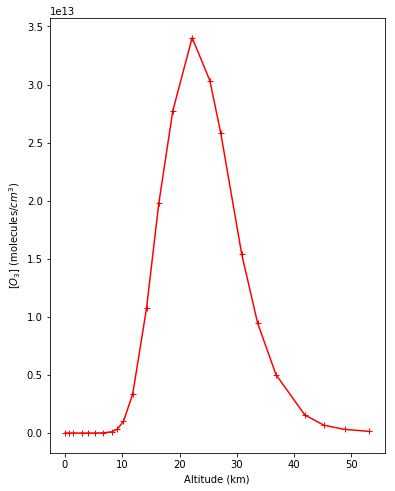

In [116]:
fig6 = plt.figure(figsize=(6, 8))
O3p = fig6.add_subplot(111)
O3p.plot(Altitude, O3, 'r+-', label='Observed Ozone')
O3p.set_xlabel('Altitude (km)')
O3p.set_ylabel('[$O_3$] (molecules/$cm^3$)')

We want to find the area under the curve above. We can do that with the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a> function, which uses the trapezoidal rule for numerical integration. We'll need to make sure units are appropriate (ie. altitude should be in $cm$ if concentration is in molecules/$cm^3$).

In [117]:
Altitudecm = [Altitude[z]*1e5 for z in range(0,len(Pressure))]
np.trapz(O3, x=Altitudecm)

5.257236157557989e+19

# Answer to Q4b.

[type your answer here]

# Q4c. Why might modelled ozone be so much greater than the observed ozone concentrations? <i>(4 marks)</i>

# Answer to Q4c.

[type your answer here]

When you have finished your assignment, you need to save it as a PDF and submit that PDF on Quercus. In your Jupyter Notebook, goto File --> Download ad --> PDF via LaTeX (.pdf)
<img src="http://individual.utoronto.ca/sck/CHM210/save2pdf.jpg">

If you have technical questions related to Python or Jupyter, contact Sarah Kavassalis (sarah.kavassalis@mail.utoronto.ca).
